In [2]:
import json
import matplotlib as mpl 
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2
import os
from pycocotools.coco import COCO

In [3]:
GT_JSON = './detection/dataset/train.json'

with open(GT_JSON, 'r') as outfile:
    train_data = (json.load(outfile))
    
print(train_data.keys())

dict_keys(['info', 'licenses', 'images', 'categories', 'annotations'])


In [4]:
category_names = {}
for n in train_data['categories']:
    category_names[n['id']] = n['name']
print(category_names)

{0: 'General trash', 1: 'Paper', 2: 'Paper pack', 3: 'Metal', 4: 'Glass', 5: 'Plastic', 6: 'Styrofoam', 7: 'Plastic bag', 8: 'Battery', 9: 'Clothing'}


In [5]:
category_count = {}
for c in category_names.keys():
    category_count[category_names[c]] = 0
    
print(category_count)

{'General trash': 0, 'Paper': 0, 'Paper pack': 0, 'Metal': 0, 'Glass': 0, 'Plastic': 0, 'Styrofoam': 0, 'Plastic bag': 0, 'Battery': 0, 'Clothing': 0}


In [6]:
for anno in train_data['annotations']:
    i = anno['category_id']
    cate = category_names[i]
    category_count[cate] += 1
    
print(category_count)

{'General trash': 3966, 'Paper': 6352, 'Paper pack': 897, 'Metal': 936, 'Glass': 982, 'Plastic': 2943, 'Styrofoam': 1263, 'Plastic bag': 5178, 'Battery': 159, 'Clothing': 468}


In [47]:
def bar_graph(data, title):
    fig, ax = plt.subplots(1, 1, figsize=(15, 6))
    ax.bar(data.keys(), data.values(),
           width=0.65, 
           color='royalblue',
           linewidth=1,
           edgecolor='black'
          )

    ax.margins(0.001, 0.1)
    ax.set(frame_on=False) # 테두리(축 포함) 없애기
    ax.set_yticks([]) # y축 눈금 없애기
    ax.set_xticks(sorted(data.keys()))
    # ax.set_xticklabels(data.keys())

    ax.set_title(title, fontsize=14, fontweight='semibold')

    for idx, val in data.items():
        ax.text(x=idx, y=val+50, s=val, 
                va='bottom', ha='center', # 막대의 중앙, 막대 위 배치
                fontsize=11, fontweight='semibold',
                # rotation=90
               )

    plt.show()

/opt/conda/envs/detection/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


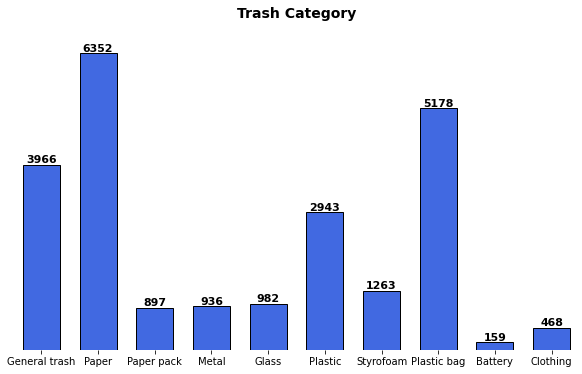

In [20]:
bar_graph(category_count, 'Trash Category')

In [12]:
category_ratio = {}
s = sum(category_count.values())
for key in category_count.keys():
    category_ratio[key] = category_count[key] / s * 100
print(category_ratio)

{'General trash': 17.136190805392324, 'Paper': 27.445558244037333, 'Paper pack': 3.8757345316280682, 'Metal': 4.044244728655375, 'Glass': 4.243000345661942, 'Plastic': 12.716038714137573, 'Styrofoam': 5.457137919115105, 'Plastic bag': 22.372969236087105, 'Battery': 0.6870031109574836, 'Clothing': 2.0221223643276875}


In [40]:
box_count = [0] * len(train_data['images'])
print(len(box_count))

4883


In [41]:
print(len(train_data['annotations']))
for anno in train_data['annotations']:
    i = anno['image_id']
    box_count[i] += 1
    
count_dic = {}
for cnt in box_count:
    if cnt in count_dic.keys():
        count_dic[cnt] += 1
    else:
        count_dic[cnt] = 1
        
sorted_count_dic = {}
for i in sorted(count_dic.keys()):
    sorted_count_dic[i] = count_dic[i]
    
print(sorted_count_dic)

23144
{1: 1980, 2: 783, 3: 405, 4: 259, 5: 218, 6: 166, 7: 157, 8: 102, 9: 107, 10: 88, 11: 67, 12: 66, 13: 48, 14: 46, 15: 45, 16: 49, 17: 40, 18: 27, 19: 23, 20: 23, 21: 16, 22: 20, 23: 15, 24: 16, 25: 14, 26: 17, 27: 11, 28: 13, 29: 5, 30: 5, 31: 9, 32: 9, 33: 3, 34: 6, 35: 3, 37: 3, 38: 3, 39: 2, 40: 3, 41: 1, 42: 2, 44: 1, 46: 3, 48: 1, 52: 1, 55: 1, 71: 1}


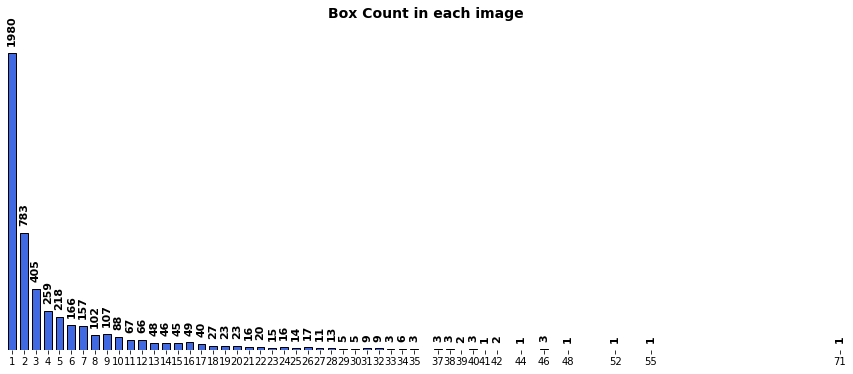

In [68]:
bar_graph(sorted_count_dic, 'Box Count in each image')

In [42]:
print(box_count.index(71))

4197


In [44]:
t = 0
for b in count_dic.keys():
    t += count_dic[b] * b
    
print(t)

23144


In [40]:
print(len(train_data['images']))

4883


In [69]:
print(train_data['images'][0])

{'width': 1024, 'height': 1024, 'file_name': 'train/0000.jpg', 'license': 0, 'flickr_url': None, 'coco_url': None, 'date_captured': '2020-12-26 14:44:23', 'id': 0}


In [43]:
category_in_img = [[0] * 10 for _ in range(len(train_data['images']))]
for img_id in range(len(train_data['images'])):
    ann_ids = coco.getAnnIds(imgIds=img_id)
    ann_info_list = coco.loadAnns(ann_ids)
    for ann_info in ann_info_list:
        category_in_img[img_id][ann_info['category_id']] += 1

In [44]:
category_in_img_count = {}
for cate in category_in_img:
    temp = 10 - cate.count(0)
    if temp in category_in_img_count.keys():
        category_in_img_count[temp] += 1
    else:
        category_in_img_count[temp] = 1
        
print(category_in_img_count)

{1: 2527, 5: 187, 2: 1134, 4: 347, 3: 605, 6: 66, 7: 17}


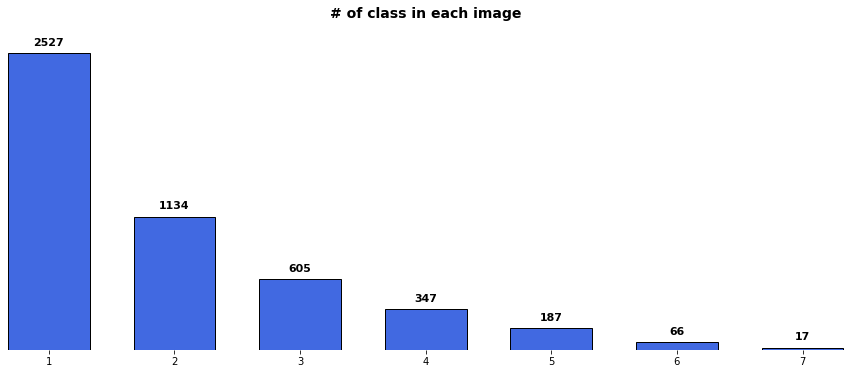

In [49]:
category_in_img_count_sorted = {}
for k in sorted(category_in_img_count.keys()):
    category_in_img_count_sorted[k] = category_in_img_count[k]
    
bar_graph(category_in_img_count_sorted, '# of class in each image')

In [57]:
ww = []
hh = []
scales = []
for ann in train_data['annotations']:
    ww.append(ann['bbox'][2])
    hh.append(ann['bbox'][3])
    # if ann['bbox'][2] == 0.7:
    #     print(ann['bbox'])
    scales.append(ann['bbox'][2] / ann['bbox'][3])

In [56]:
print('max width : ' + str(max(ww)))
print('min width : ' + str(min(ww)))
print('max height : ' + str(max(hh)))
print('min height : ' + str(min(hh)))
print('------------------------')
print('avg width : ' + str(sum(ww) / len(ww)))
print('avg height : ' + str(sum(hh) / len(hh)))

max width : 1023.9
min width : 0.7
max height : 1023.9
min height : 0.8
------------------------
avg width : 257.4991704113376
avg height : 252.24151832008272


In [59]:
print('max scale : ' + str(max(scales)))
print('min scale : ' + str(min(scales)))
print('------------------------')
print('avg scale : ' + str(sum(scales) / len(scales)))

max scale : 27.28571428571429
min scale : 0.05539070227497527
------------------------
avg scale : 1.2987072717328478


In [70]:
c = 0
for i in range(len(ww)):
    if ww[i] < 40 and hh[i] < 40:
        c += 1
print(c)

224
